# Process GLOBALVIEW data
This script processes the GLOBALVIEW CO2 data. it first takes it from a .txt file and filters out the data. It then puts the data into a pandas dataframe.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
fl = '/local/data/artemis/workspace/gloege/LDEO-FFN/data/obs/raw/CO2/globalview-CO2_surface.txt'

In [2]:
# Sine of that latitudes 
sin_of_lats = np.asarray([-1.00, -0.95, -0.90, -0.85, -0.80, -0.75, -0.70, -0.65, -0.60, -0.55,  
-0.50,  -0.45,  -0.40,  -0.35, -0.30,  -0.25,  -0.20,  -0.15,  -0.10,  -0.05,   
0.00,   0.05,   0.10,   0.15,   0.20,   0.25,   0.30,   0.35,   0.40,   0.45,   
0.50,   0.55,   0.60,   0.65,   0.70,   0.75,   0.80,   0.85,   0.90,   0.95,   1.00])

# Convert to degrees 
lats = np.arcsin(sin_of_lats)*180/np.pi

In [7]:
df = pd.read_table(fl, skiprows=78, delim_whitespace=True, header=None)
df = df.set_index(list(df)[0]).iloc[:, ::2]
df.columns = lats
df.index.name = 'year'

In [5]:
np.diff(lats)

array([18.19487234,  7.64706042,  5.94639785,  5.08156703,  4.53972446,
        4.16337389,  3.88540213,  3.67170423,  3.50288468,  3.36701297,
        3.25631605,  3.16550547,  3.09086336,  3.02971199,  2.98009094,
        2.94055315,  2.91003247,  2.88775608,  2.87318649,  2.86598398,
        2.86598398,  2.87318649,  2.88775608,  2.91003247,  2.94055315,
        2.98009094,  3.02971199,  3.09086336,  3.16550547,  3.25631605,
        3.36701297,  3.50288468,  3.67170423,  3.88540213,  4.16337389,
        4.53972446,  5.08156703,  5.94639785,  7.64706042, 18.19487234])

In [8]:
df.head()

,-90.0,-71.80512766123321,-64.15806723683288,-58.21166938294838,-53.13010235415598,-48.590377890729144,-44.4270040008057,-40.54160187350453,-36.86989764584402,-33.36701296923176,...,33.36701296923176,36.86989764584402,40.54160187350453,44.4270040008057,48.590377890729144,53.13010235415598,58.21166938294838,64.15806723683288,71.80512766123321,90.0
year,,,,,,,,,,,,,,,,,,,,,
1979.000000,334.636,334.640,334.641,334.634,334.618,334.590,334.553,334.508,334.458,334.405,...,338.767,338.966,339.078,339.140,339.185,339.234,339.293,339.356,339.418,339.472
1979.020833,334.549,334.564,334.578,334.587,334.588,334.580,334.564,334.540,334.512,334.481,...,339.200,339.410,339.528,339.588,339.622,339.646,339.669,339.692,339.714,339.732
1979.041667,334.449,334.474,334.500,334.524,334.545,334.560,334.569,334.573,334.573,334.570,...,339.579,339.787,339.902,339.957,339.981,339.991,339.995,339.998,339.999,340.001
1979.062500,334.338,334.372,334.409,334.449,334.490,334.529,334.565,334.598,334.627,334.654,...,339.893,340.087,340.190,340.237,340.254,340.261,340.266,340.270,340.274,340.278
1979.083333,334.221,334.263,334.311,334.366,334.425,334.486,334.547,334.606,334.663,334.717,...,340.143,340.314,340.400,340.437,340.454,340.470,340.491,340.516,340.542,340.564


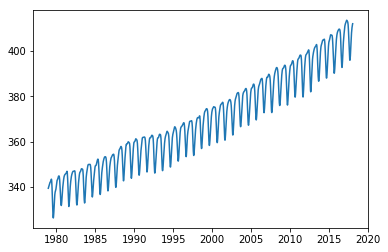

In [10]:
plt.plot(df.index, df.iloc[:,40])

# Create NetCDF File
the NOAA MLB product uses ~weekly data. there are 48 equal time steps each year (~7.6 days)

In [11]:
dir_obs = '/local/data/artemis/workspace/gloege/LDEO-FFN/data/obs'
dir_hindcast = '/local/data/artemis/workspace/gloege/LDEO-FFN/data/hindcast'
dir_raw = '/local/data/artemis/workspace/gloege/LDEO-FFN/data/raw'

In [27]:
### ================================================
### force time vector to be proper format and range
### ================================================
dates = pd.date_range(start='1979-01-01T00:00:00.000000000', 
                      end='2018-01-01T00:00:00.000000000', periods=1873)
da_dates = xr.DataArray(dates, dims='time')

In [28]:
print(np.shape(df.values))
print(np.shape(da_dates))
print(np.shape(lats))

(1873, 41)
(1873,)
(41,)


In [29]:
ds_out = xr.Dataset(
    {
    'XCO2':(['time','lat'], df.values ),
    },

    coords={
    'lat': (['lat'], lats),
    'time': (['time'], da_dates)
    })

In [30]:
ds_out

<xarray.Dataset>
Dimensions:  (lat: 41, time: 1873)
Coordinates:
  * lat      (lat) float64 -90.0 -71.81 -64.16 -58.21 ... 58.21 64.16 71.81 90.0
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-01-01
Data variables:
    XCO2     (time, lat) float64 334.6 334.6 334.6 334.6 ... 412.0 412.1 412.1

In [31]:
ds_out_monthly = ds_out.resample(time='1MS').mean()

In [32]:
ds_out_monthly

<xarray.Dataset>
Dimensions:  (lat: 41, time: 469)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-01-01
  * lat      (lat) float64 -90.0 -71.81 -64.16 -58.21 ... 58.21 64.16 71.81 90.0
Data variables:
    XCO2     (time, lat) float64 334.4 334.5 334.5 334.5 ... 412.0 412.1 412.1

# Repeat along dimension

In [33]:
lon = np.arange(0.5,360,1)
ds_lon = xr.DataArray(np.zeros([len(lon)]), coords=[('lon', lon)])
ds_data, ds_mask = xr.broadcast(ds_out_monthly, ds_lon)

In [34]:
ds_data_interp = ds_data.interp(lat=np.arange(-89.5, 90, 1), method='linear')

In [35]:
ds_data_interp

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 469)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-01-01
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    XCO2     (lat, time, lon) float64 334.4 334.4 334.4 ... 412.1 412.1 412.1

In [36]:
dates = pd.date_range(start='1979-01-01T00:00:00.000000000', 
                      end='2018-01-01T00:00:00.000000000',freq='MS')+ np.timedelta64(14, 'D')
da_dates = xr.DataArray(dates, dims='time')
np.shape(da_dates)

(469,)

In [37]:
ds_data_interp['time'] = da_dates

In [38]:
ds_data_interp

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 469)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-15 1979-02-15 ... 2018-01-15
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    XCO2     (lat, time, lon) float64 334.4 334.4 334.4 ... 412.1 412.1 412.1

In [39]:
ds_data_interp.transpose('time', 'lat', 'lon').to_netcdf(f'{dir_obs}/GLOBALVIEW_XCO2_1x1_197901-201801.nc')

# masking XCO2

In [211]:
ds = xr.open_dataset('/local/data/artemis/workspace/gloege/LDEO-FFN/data/hindcast/originals/CESM-hindcast_XCO2_1x1_198201-201512_unmasked.nc')

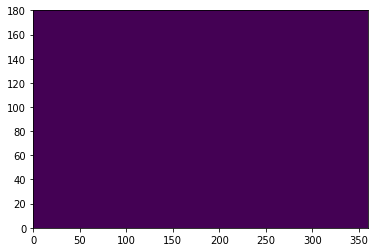

In [212]:
plt.pcolor(ds['XCO2'][0,:,:])

In [179]:
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 408)
Coordinates:
    TLAT     float64 ...
    TLONG    float64 ...
  * time     (time) datetime64[ns] 1982-01-15 1982-02-15 ... 2015-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    XCO2     (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.5 (http://m...
    history:                   Tue Mar 19 14:17:50 2019: cdo settunits,days C...
    source:                    CCSM POP2, the CCSM Ocean Component
    Conventions:               CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netc...
    nsteps_total:              2263750
    tavg_sum:                  2678400.0
    title:                     g.e11_LENS.GECOIAF.T62_g16.009
    start_time:                This dataset was created on 2015-07-15 at 00:5...
    cell_methods:              cell_me

In [180]:
ds['XCO2']

<xarray.DataArray 'XCO2' (time: 408, lat: 180, lon: 360)>
[26438400 values with dtype=float32]
Coordinates:
    TLAT     float64 ...
    TLONG    float64 ...
  * time     (time) datetime64[ns] 1982-01-15 1982-02-15 ... 2015-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    long_name:     Atmospheric CO2
    units:         ppmv
    grid_loc:      2110
    cell_methods:  time: mean nlat, nlon: mean

In [213]:
### ================================================
### SOM-FFN mask
### mask created using _create_SOMFFN_mask.ipynb
### ================================================
fl_mask = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean/mask_somffn.nc'
ds_mask = xr.open_dataset(fl_mask)


In [214]:
ds['XCO2'] = ds['XCO2'].where(ds_mask['mask']==1)

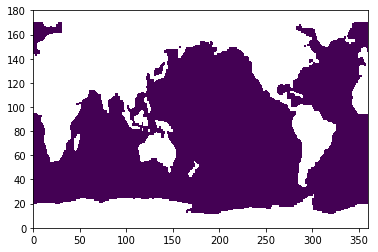

In [215]:
plt.pcolor(ds['XCO2'][0,:,:])

In [216]:
ds.to_netcdf('/local/data/artemis/workspace/gloege/LDEO-FFN/data/hindcast/CESM-hindcast_XCO2_1x1_198201-201512.nc')

In [190]:
ds_filled = ds.fillna(0)

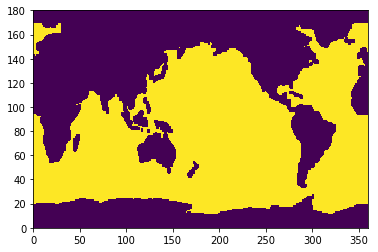

In [191]:
plt.pcolor(ds_filled['XCO2'][0,:,:])

In [192]:
ds_filled.to_netcdf('/local/data/artemis/workspace/gloege/LDEO-FFN/data/hindcast/CESM-hindcast_XCO2_1x1_198201-201512.nc')

In [ ]:
dates = pd.date_range(start='1970-01-01T00:00:00.000000000', 
                      end='2017-12-01T00:00:00.000000000',freq='MS')+ np.timedelta64(14, 'D')
da_dates = xr.DataArray(dates, dims='time')
np.shape(da_dates)